<h1>Logistic Regression Implementation</h1>

This project consists on loading the development of a from scratch implementation of logistic regression in order to predict the diabetes dataset made available by Sci-kit Learn. Please not that this framework will only be used to import the data.

From the implementation of the Machine Learning Model, there will be an implementation of the Gradient Descent algorithm with weight regularization. For the latter to make sense, the data will be cut in 1/6 to generate overfitting by the model such that regularization will be necessary

<h3>1 - Data preprocessing</h3>

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

For the sake of ease of plotting the data, only the features of the dataset mean radius and mean texture will be used

In [4]:
import numpy as np
import math

In [5]:
X = np.column_stack((breast_cancer.data[:, 0], breast_cancer.data[:, 1]))[:len(breast_cancer.data)//6] # cut down the data by 1/4
y = np.array(breast_cancer.target)[:len(breast_cancer.target)//6]

In [6]:
m,n = X.shape
print(f"Shape of the dependent variables {X.shape}")
print(f"Shape of the independent variable {y.shape}")
print ('There are m = %d training examples' % (m))
print ('There are n = %d features' % (n))

Shape of the dependent variables (94, 2)
Shape of the independent variable (94,)
There are m = 94 training examples
There are n = 2 features


Let's plot $x_1$, $x_2$ and $x_3$ against $y$ to observe the nature of this dataset
 

In [7]:
import matplotlib.pyplot as plt

In [8]:
x_1 = X[:, 0]
x_2 = X[:,1]

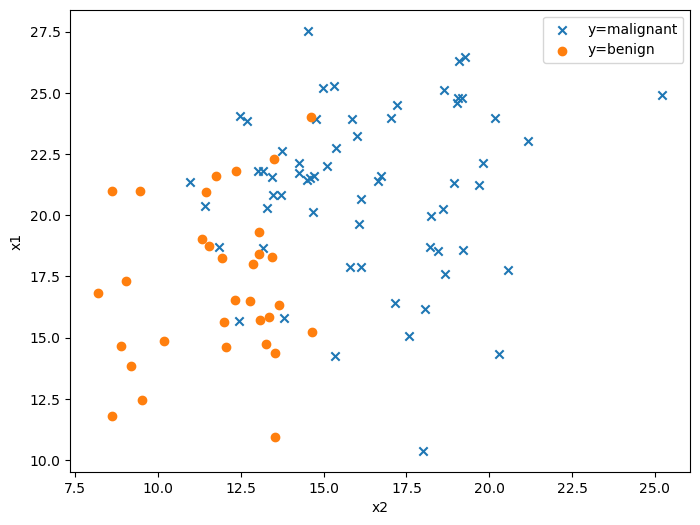

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x_1[y==0], x_2[y==0], marker='x', label='y=malignant')
ax.scatter(x_1[y==1], x_2[y==1], marker='o', label='y=benign')

ax.set_ylabel("x1")
ax.set_xlabel("x2")
ax.legend()

<h3>2 - Logistic Regression</h3>

For logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

<h4>2.1 - Sigmoid function</h4>

In [10]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1+np.exp(-z))
    
    return g

The sigmoid function is used to predict classes (or categories) instead of predicting continous numbers like in Linear Regression. In a sigmoid function, the output can vary between 0 and 1 and this result represents the likely hood of a positive or a negative outcome, which in this case is if the tumour is malignant or benign

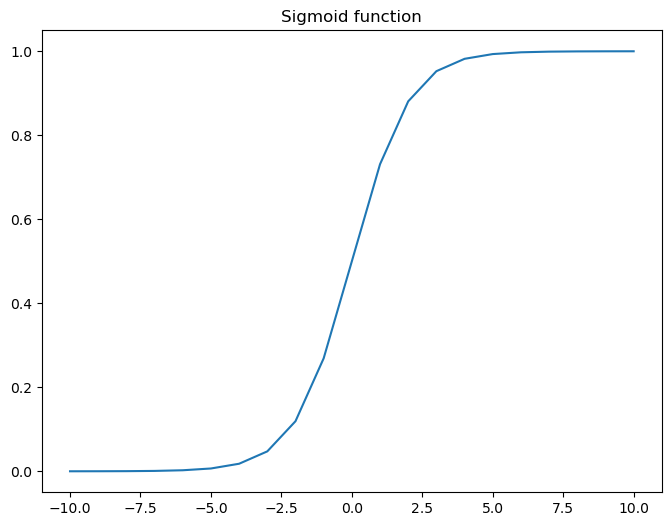

In [11]:
# Generate an array of evenly spaced values between -10 and 10
x_values = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y_values = sigmoid(x_values)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_values, y_values)
ax.set_title("Sigmoid function")
plt.show()

In [12]:
value = 0
print("Expected result for sigmoid function of g(0) = 0.5")
print (f"sigmoid({value}) = {sigmoid(value)}")

Expected result for sigmoid function of g(0) = 0.5
sigmoid(0) = 0.5


<h4>2.2 - Cost Function</h4>

For logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    

In [13]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    total_cost = 0

    z = w.dot(X.T) + b
    
    total_cost = (1/m) * np.sum( (-y)*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z)) )

    return total_cost

In [14]:
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X, y, initial_w, initial_b)
print(f"Cost at initial w and b: {cost}")

Cost at initial w and b: -0.221217185285089


The Cost Surface plot shows us roughly where the the hyperparameters for minimal cost can be found

C:\Users\Henrique\AppData\Local\Temp\ipykernel_16772\1270174508.py:12: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))
C:\Users\Henrique\AppData\Local\Temp\ipykernel_16772\1618131744.py:19: RuntimeWarning: divide by zero encountered in log
  total_cost = (1/m) * np.sum( (-y)*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z)) )
C:\Users\Henrique\AppData\Local\Temp\ipykernel_16772\1618131744.py:19: RuntimeWarning: invalid value encountered in multiply
  total_cost = (1/m) * np.sum( (-y)*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z)) )
c:\Users\Henrique\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:113: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


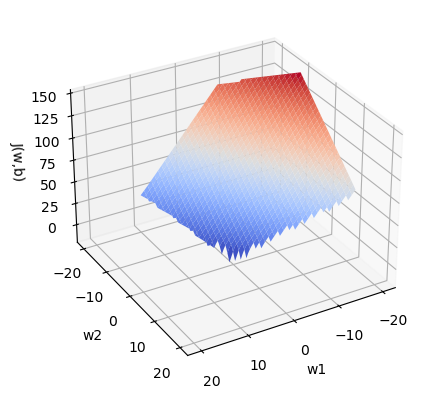

In [15]:
import matplotlib.pyplot as plt
initial_w = np.zeros(n)
initial_b = 0.
w1_range = np.linspace(-20, 20, 100)
w2_range = np.linspace(-20, 20, 100)
w1, w2 = np.meshgrid(w1_range, w2_range)

cost = np.zeros((w1_range.size, w2_range.size))
for i, w1_val in enumerate(w1_range):
    for j, w2_val in enumerate(w2_range):
        w = np.array([w1_val, w2_val])
        cost[i, j] = compute_cost(X, y, w, initial_b)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(w1, w2, cost, cmap='coolwarm')

ax.view_init(elev=30, azim=60)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J(w,b)')

plt.show()


<h4>2.3 - Gradient Descent</h4>

The formula for gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

And where  $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is given by
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

In [16]:
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid( np.dot(X[i].T, w) + b )
        err_i = f_wb_i - y[i]
        
        dj_db = dj_db + err_i

        for j in range(n):
            dj_dw[j] += err_i * X[i,j]

    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m 

    return dj_db, dj_dw

<h4>2.4 - Learning parameters using gradient descent</h4>

In [17]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
            w_history.append(w_in)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [18]:
np.random.seed(1)
initial_w = 0.01 * (abs(np.random.rand(2)) )
initial_b = 0.01

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,w_history = gradient_descent(X ,y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost    -0.25   
Iteration 1000: Cost     0.16   
Iteration 2000: Cost     0.16   
Iteration 3000: Cost     0.16   
Iteration 4000: Cost     0.15   
Iteration 5000: Cost     0.15   
Iteration 6000: Cost     0.15   
Iteration 7000: Cost     0.15   
Iteration 8000: Cost     0.15   
Iteration 9000: Cost     0.15   
Iteration 9999: Cost     0.15   


<h4>2.5 - Learning Curve & Decision Boundary</h4>

In [19]:
def plot_learning_curve():
    plt.plot(range(50, iterations), J_history[50:] )
    plt.ylabel("Cost")
    plt.xlabel("Iteration")
    plt.show()

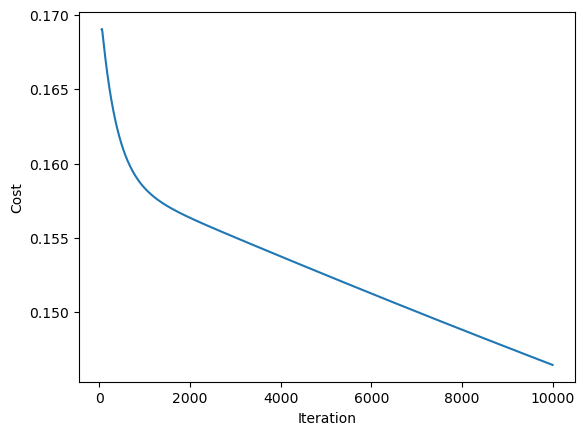

In [20]:
plot_learning_curve()

In [21]:

def plot_decision_boundary():
    # Generate x values for plotting
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    xx = np.linspace(x_min, x_max, 100)

    # Compute y values using the decision boundary equation
    yy = (-b - w[0]*xx)/w[1]

    # Plot the scatter plot
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    # Plot the decision boundary
    plt.plot(xx, yy, 'k-', label='decision boundary')

    # Add labels and legend
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

The Decision Boundary line has a wrong origin axis value which can indicate an overfitting of the model which was done consciously so that the regularization of the model would be necessary.

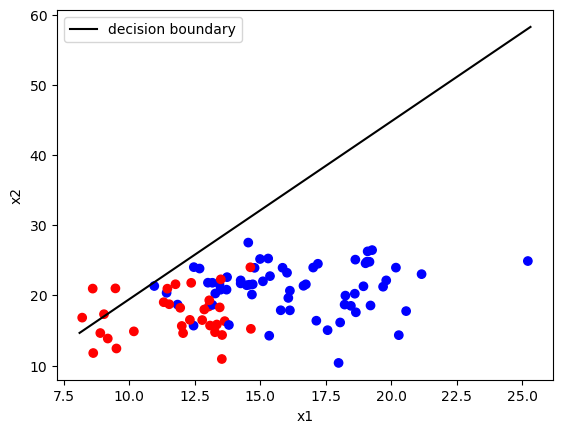

In [22]:
plot_decision_boundary()

<h4>2.6 - Accuracy of the not regularized model</h4>

In [23]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        
        z_wb = np.dot(X[i],w)
        
        # Loop over each feature
        for j in range(n): 
            
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    ### END CODE HERE ### 
    return p

In [24]:
#Compute accuracy on the training set
p = predict(X, w, b)
acc_unreg = np.mean(p == y) * 100
print('Train Accuracy: %f'%(acc_unreg))

Train Accuracy: 70.212766


<h4>3.1 - Cost function for regularized logistic regression</h4>

For the regularized logistic regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

The difference is the regularization term, which is $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 
Note that the $b$ parameter is not regularized.

In [25]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    reg_cost = sum(np.square(w))
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

In [26]:

np.random.seed(1)
initial_w = np.random.rand(X.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X, y, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : -2.501801581491701


<h4>3.1 - Gradient for regularized logistic regression</h4>


The gradient of the regularized cost function has two components. The first, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ is a scalar, the other is a vector with the same shape as the parameters $\mathbf{w}$, where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \boxed{for j=0...(n-1)}$$

Compare this to the gradient of the cost function without regularization (which you implemented above), which is of the form 
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As you can see,$\frac{\partial J(\mathbf{w},b)}{\partial b}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w},b)}{\partial w}$, which is $$\frac{\lambda}{m} w_j  \quad\, \boxed{for j=0...(n-1)}$$ 

In [27]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for logistic regression with regularization
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)   
    
    for j in range(n): 

          dj_dw_j_reg = lambda_ / m * w[j]

          # Add the regularization term  to the correspoding element of dj_dw
          dj_dw[j] = dj_dw[j] + dj_dw_j_reg
   
        
    return dj_db, dj_dw

In [28]:

np.random.seed(1) 
initial_w  = np.random.rand(X.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X, y, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.6250110405514628
First few elements of regularized dj_dw:
 [10.23965318829007, 13.299555544161395]


In [29]:
np.random.seed(1)
initial_w = np.random.rand(X.shape[1])
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X, y, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost   -12.06   
Iteration 1000: Cost     0.12   
Iteration 2000: Cost     0.12   
Iteration 3000: Cost     0.11   
Iteration 4000: Cost     0.10   
Iteration 5000: Cost     0.10   
Iteration 6000: Cost     0.09   
Iteration 7000: Cost     0.09   
Iteration 8000: Cost     0.08   
Iteration 9000: Cost     0.08   
Iteration 9999: Cost     0.08   


<h4>3.2 - Decision Boundary for the regularized model</h4>

The decision boundary line for the regularized model seems to be much more accurate

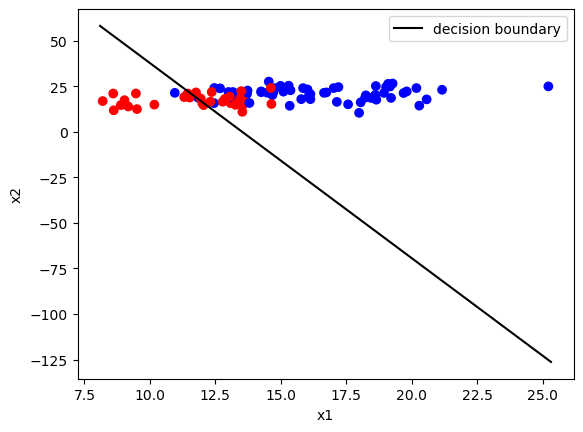

In [30]:
plot_decision_boundary()

<h4>3.2 - Learning Curve of the regularized model</h4>

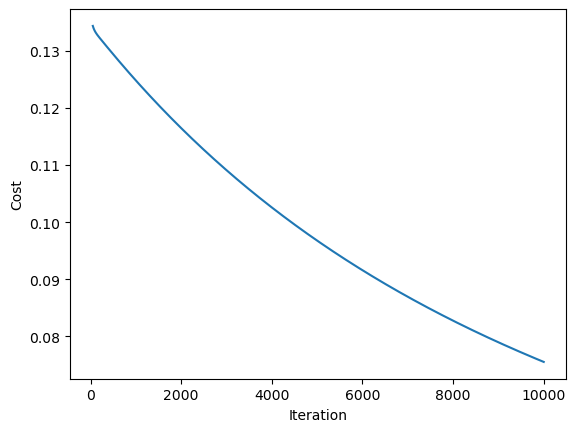

In [31]:
plot_learning_curve()

<h3>3.3 - Accuracy of the regularized model</h3>

In [32]:
#Compute accuracy on the training set
p = predict(X, w, b)

acc_reg = np.mean(p == y) * 100

print('Train Accuracy: %f'%(acc_reg))

Train Accuracy: 78.723404


In [34]:

print(f"The accuracy improvement due to the regularization of the model's weight was {float(((acc_reg - acc_unreg) / acc_unreg) * 100):8.2f}%")

The accuracy improvement due to the regularization of the model's weight was    12.12%
